# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [69]:
import xlwings as xw
from xlwings.constants import AutoFillType
import numpy as np
wb = xw.Book('себестоимостьА_в1.xlsx')
recipes = wb.sheets['Рецептура']
c = recipes.range('G7:O10').options(np.array).value
c = np.nan_to_num(c)
unit_prices = recipes.range('G14:O14').value
cost = np.sum(c*unit_prices, axis=1)
cost

array([21.48 , 16.525, 17.423, 18.085])

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [70]:
recipes.range('T6').value = 'Себестоимость'
recipes.range('T7').options(transpose=True).value = cost

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [71]:
recipes.range('T4:T6').api.Merge()
recipes.range('T4:T6').font.bold = True
recipes.range('T5').columns.autofit()

4. Выполнить 3 с помощью "протягиваемых" формул.

In [72]:
wb1 = xw.Book('себестоимостьА_в1.xlsx')
recipes1 = wb1.sheets['Рецептура']
recipes1.range('Q7:Q10').formula = f'=$G$14*G7+$H$14*H7+$I$14*I7+$J$14*J7+$K$14*K7+$L$14*L7+M7*$M$14+N7*$N$14+O7*$O$14'

## Лабораторная работа 7.1

In [43]:
import csv
import pandas as pd
import xlwings as xw

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [44]:
reviews_df1 = pd.read_csv('reviews_sample.csv',
                  delimiter=',', 
                  index_col=0,
                 parse_dates=['date'])
reviews_df1.head()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [45]:
recipes_df2 = pd.read_csv('recipes_sample.csv', delimiter=',',
                  usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients'],
                  parse_dates=['submitted'])
recipes_df2.head()


,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [46]:
reviews1_df1 = reviews_df1.sample(frac=0.05)#frac в Python - это параметр метода sample в библиотеке pandas, который позволяет случайным образом выбрать долю строк из DataFrame.
reviews1_df1.head()
recipes1_df2 = recipes_df2.sample(frac=0.05)#frac в Python - это параметр метода sample в библиотеке pandas, который позволяет случайным образом выбрать долю строк из DataFrame.
recipes1_df2.head()

,name,id,minutes,submitted,description,n_ingredients
3051,billy s chocolate buttercream,167665,10,2006-05-10,as seen on martha stewart. courtesy of billy ...,5.0
7663,cornmeal pie crust,166905,10,2006-05-04,"i haven't tried this, but thought it sounded i...",NaN
13309,hamburgers with brown gravy total comfort foo...,32973,45,2002-07-02,these are sooooo great (and ez)! i grew up eat...,11.0
18223,ms gayle s homemade pimento and cheese,294547,10,2008-03-25,"ok, so this is the one hundred thousandth pime...",3.0
21708,pumpkin jingle bars,48633,25,2002-12-13,these are yummy and look so festive for the ho...,7.0


In [47]:
with pd.ExcelWriter('recipes.xlsx') as writer:
    reviews1_df1.to_excel(writer, sheet_name='Отзывы')
    recipes1_df2.to_excel(writer, sheet_name='Рецепты')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [48]:
import xlwings as xw
book = xw.Book('recipes.xlsx')
sheet = book.sheets['Рецепты']
sheet.range("H1").value = 'seconds_assign'
second_assign = (recipes1_df2["minutes"] * 60).to_numpy() #to_numpy для преобразования DataFrame в NumPy массив 
sheet.range("H2:H1501").options(transpose=True).value = second_assign # transpose=True транспонирование

In [49]:
recipes1_df2.shape[0]+1

1501

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [50]:
sheet.range("I1").value = 'seconds_formula'
data = sheet.range("I2").formula = f'=D2 * 60'
xw.Range("I2:I1501").formula = data

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [51]:
sheet.range('H1').api.Font.Bold = True #Объект api обычно используется для выполнения расширенных задач, таких как управление формулами 
sheet.range('I1').api.Font.Bold = True #api.Font используется для управления свойствами шрифта в Excel
sheet.range('H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter #xlHAlignCenter центрирование текста в ячейке
sheet.range('I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter #это константа, определяющая выравнивание текста в ячейке по горизонтали.

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [52]:
minutes = sheet.range("D2:D1501").value
for i in range(len(minutes)):
    if minutes[i] < 5:
        sheet.range(f'D{i+2}').color = (0, 255, 0)
    elif 5 <= minutes[i] <= 10:
        sheet.range(f'D{i+2}').color = (255, 255, 0)
    else:
        sheet.range(f'D{i+2}').color = (255, 0, 0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [53]:

formula = sheet.range("J2").formula = f'=COUNTIF(Отзывы!$C$2:$C${len(reviews1_df1)},C2)'
sheet.range("J1").value = 'n_reviews'
xw.Range("J2:J1501").formula = formula

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [62]:
def validate(sheet):
    n = str(len(reviews1_df1)+1)
    sheet.range('H2').formula = '=COUNTIF(Рецепты!$C$2:Рецепты!$C$1501,"="&D2)>0'
    sheet.range('H2').api.autofill(destination=sheet.range(f'H2:H{n}').api,
                                    type=AutoFillType.xlFillDefault)
    n = 150
    for i in range(2, int(n)+1):
        rating = sheet.range(f'F{i}').value
        if (rating < 0 or rating > 5) or sheet.range(f'H{i}').value == False:
            sheet.range(f'A{i}:G{i}').color = (255, 0, 0)
    sheet.range('H:H').value = " "

In [ ]:
sheet = book.sheets["Отзывы"]
validate(sheet)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [55]:
with open('recipes_model.csv',encoding="utf-8") as f:
    file = list(csv.reader(f, delimiter='	'))
        
new = book.sheets.add("Модель")
new.range('A2').value = file

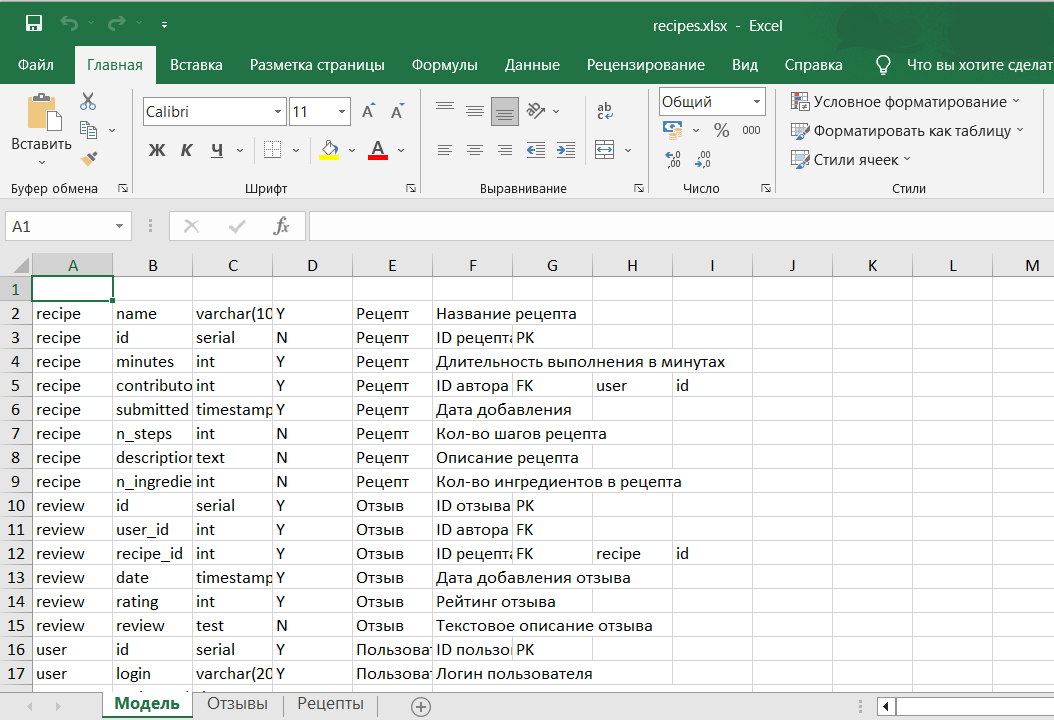

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 